# Gender Recognition by Voice and Speech Analysis

Kaggle dataset obtained from user Kory Becker on <a href="https://www.kaggle.com/primaryobjects/voicegender" target="u_blank"/> this link </a>

License of the dataset: CC BY-NC-SA 4.0

## Description:

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

## Dataset:

The following acoustic properties of each voice are measured and included within the CSV:

- **meanfreq:** mean frequency (in kHz)
- **sd:** standard deviation of frequency
- **median:** median frequency (in kHz)
- **Q25:** first quantile (in kHz)
- **Q75:** third quantile (in kHz)
- **IQR:** interquantile range (in kHz)
- **skew:** skewness (see note in specprop description)
- **kurt:** kurtosis (see note in specprop description)
- **sp.ent:** spectral entropy
- **sfm:** spectral flatness
- **mode:** mode frequency
- **centroid:** frequency centroid (see specprop)
- **peakf:** peak frequency (frequency with highest energy)
- **meanfun:** average of fundamental frequency measured across acoustic signal
- **minfun:** minimum fundamental frequency measured across acoustic signal
- **maxfun:** maximum fundamental frequency measured across acoustic signal
- **meandom:** average of dominant frequency measured across acoustic signal
- **mindom:** minimum of dominant frequency measured across acoustic signal
- **maxdom:** maximum of dominant frequency measured across acoustic signal
- **dfrange:** range of dominant frequency measured across acoustic signal
- **modindx:** modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental ---- **frequencies divided by the frequency range
- **label:** male or female

In [133]:
import pandas as pd

In [134]:
data = pd.read_csv('data/voice.csv')

In [135]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Some Analysis

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [137]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [138]:
import seaborn as sns

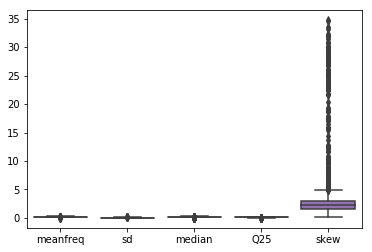

In [139]:
sns.boxplot(data = data[['meanfreq', 'sd', 'median', 'Q25', 'skew']])

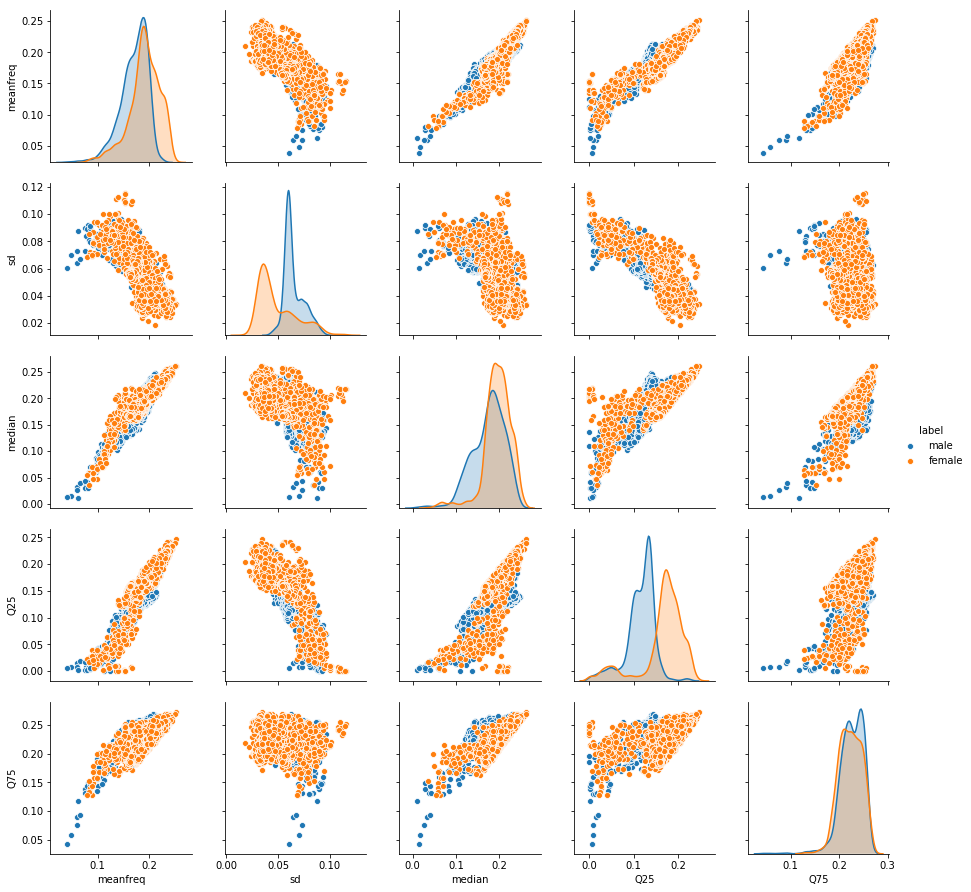

In [140]:
# first five cols
cols = list(data.iloc[:,0:5].columns)
cols.append('label');
sns.pairplot(data = data[cols], hue='label')

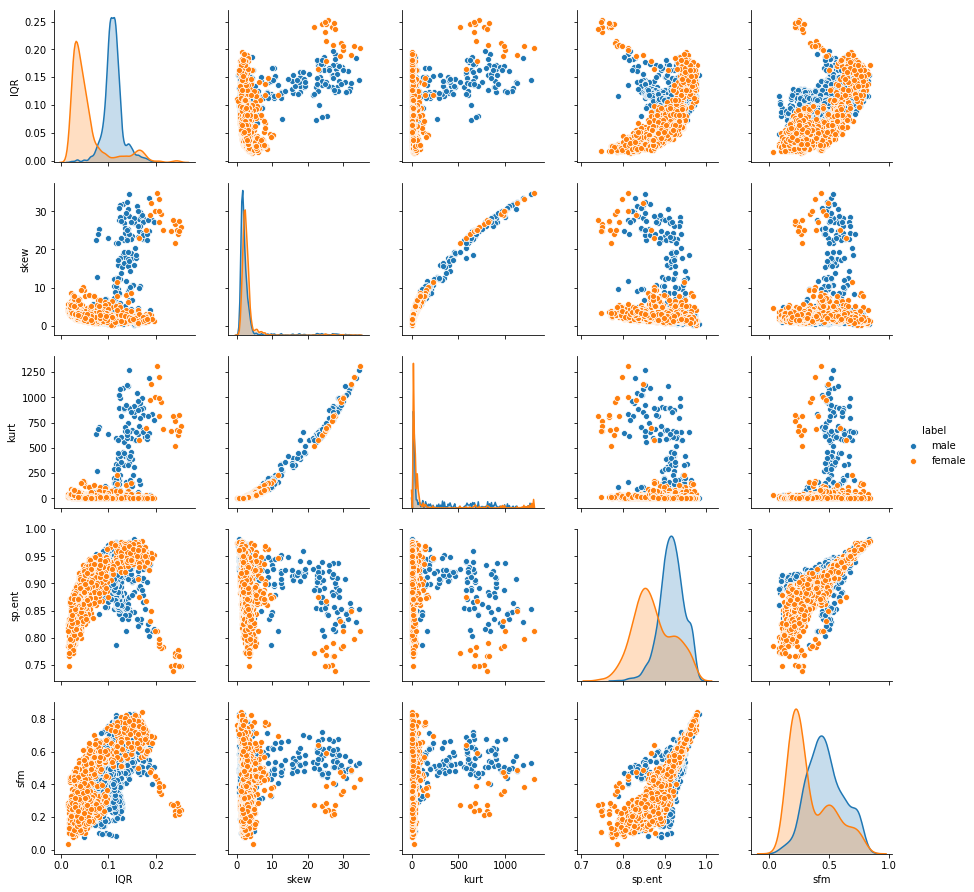

In [141]:
# second five cols
cols = list(data.iloc[:,5:10].columns)
cols.append('label');
sns.pairplot(data = data[cols], hue='label')

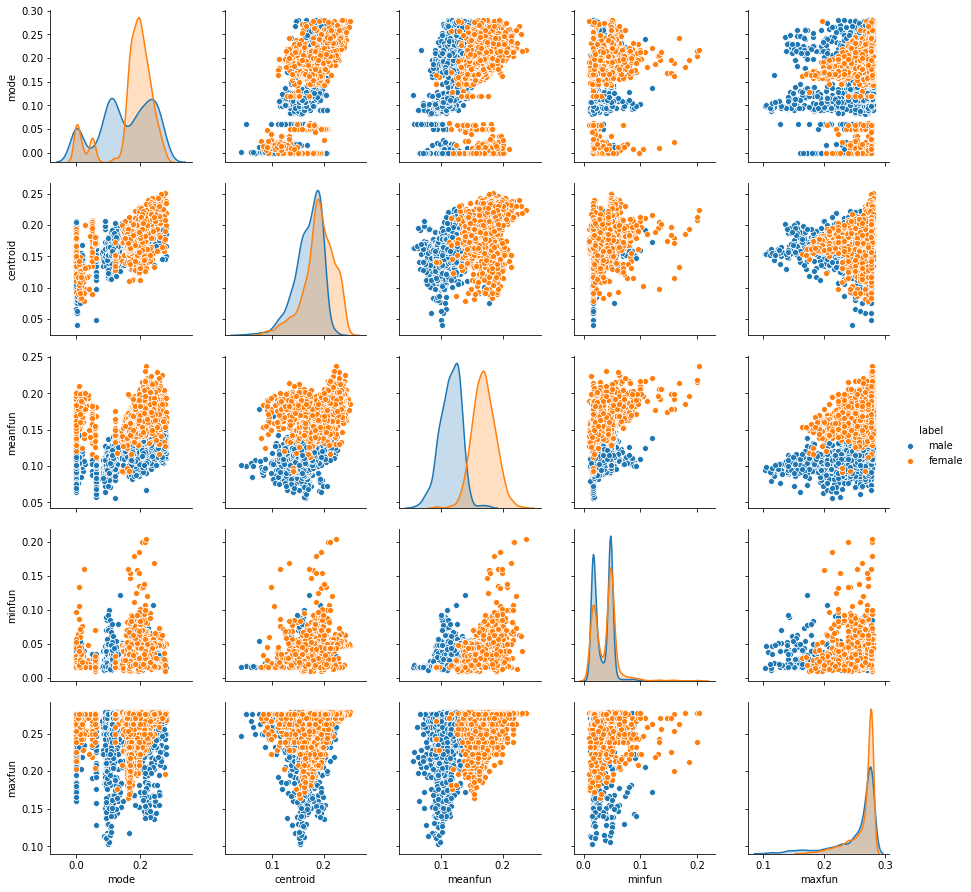

In [142]:
# third five cols
cols = list(data.iloc[:,10:15].columns)
cols.append('label');
sns.pairplot(data = data[cols], hue='label')

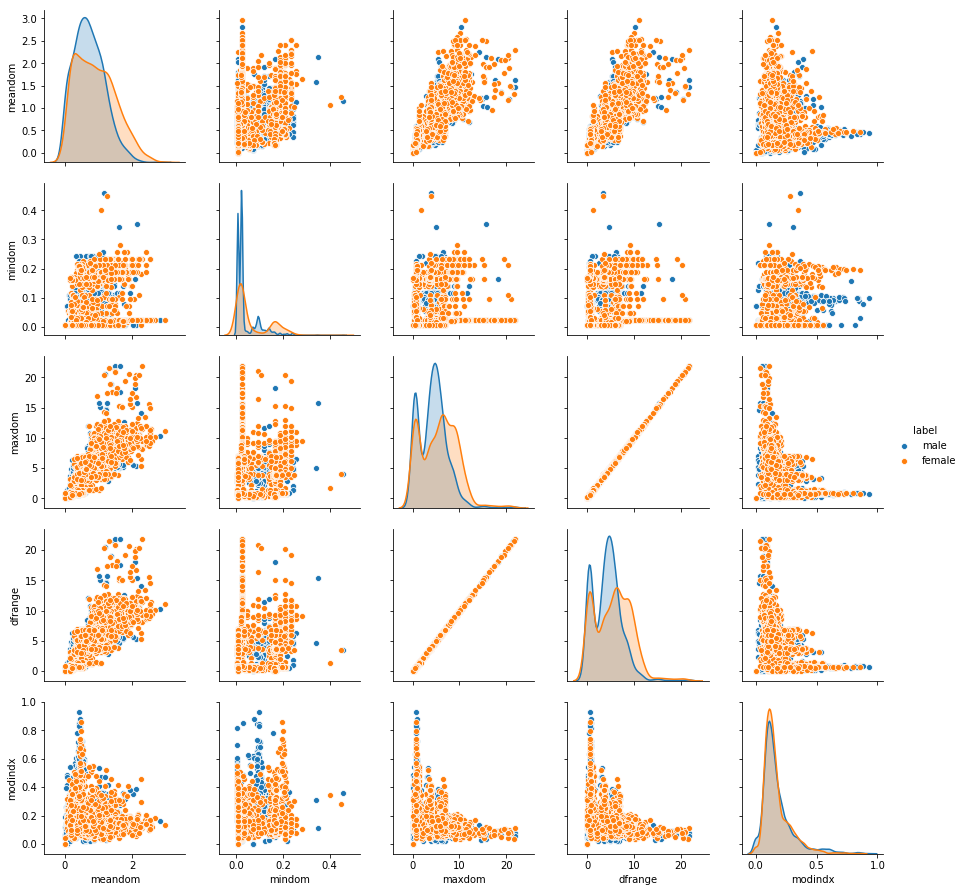

In [143]:
# fourth five cols
cols = list(data.iloc[:,15:20].columns)
cols.append('label');
sns.pairplot(data = data[cols], hue='label')

# Prepossessing

In [144]:
# 1 = female and 0 = male
data['label'] = data['label'].map({'male' : 0, 'female' : 1});
# data['label'] = pd.get_dummies(data['label'], drop_first=True)

In [145]:
data['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [146]:
# spliting into X and y
X = data.drop('label', axis=1)
y = data['label']

In [147]:
# spliting into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [148]:
# Standartization
from sklearn.preprocessing import StandardScaler

In [149]:
stdScaler = StandardScaler();
X_train = pd.DataFrame(stdScaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(stdScaler.transform(X_test), columns=X_test.columns)

In [150]:
X_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-0.053657,-0.370354,0.042895,0.572558,-0.760612,-1.060009,-0.215041,-0.224129,0.375816,0.574137,0.127215,-0.053657,0.374189,-1.014577,0.420860,2.782573,1.990862,0.437568,0.401140,2.345543
1,1.574585,-1.086468,1.492609,1.149332,1.463145,-0.507263,-0.192939,-0.215517,-1.102702,-1.230627,1.222628,1.574585,1.097513,0.593865,0.575051,2.123297,2.113604,1.204669,1.166106,0.193056
2,0.557894,0.478763,0.779262,0.861906,0.495377,-0.706616,-0.126238,-0.184954,0.259033,0.228399,-1.460578,0.557894,0.576946,-1.007119,0.271808,-1.162382,0.026982,-1.265352,-1.266036,1.291455
3,0.608657,0.207586,0.679576,0.063176,1.252713,0.607495,-0.398440,-0.237635,0.705689,-0.113901,1.438406,0.608657,-0.388760,0.540248,0.680834,0.751630,-0.463988,1.852543,1.861325,-0.826162
4,-2.287927,1.920314,-2.094288,-2.862982,-1.636621,2.351962,4.808190,4.292082,-2.065668,0.333995,-2.103772,-2.287927,-2.075760,-1.058468,0.127642,-1.549103,-0.709473,-1.425071,-1.412279,-1.432357


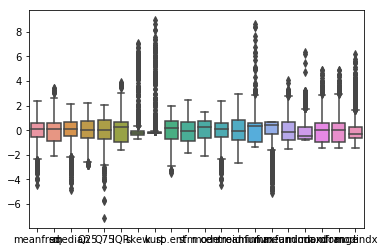

In [151]:
sns.boxplot(data=X_train)

# Decision Tree Model

In [357]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, \
f1_score, precision_score, recall_score, precision_recall_curve, plot_precision_recall_curve

import matplotlib.pyplot as plt
%matplotlib inline

In [358]:
dt = DecisionTreeClassifier(min_samples_leaf = 10, random_state=0)

In [359]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=0)

In [360]:
pred = dt.predict(X_test)

In [361]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       314
           1       0.97      0.96      0.97       320

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [362]:
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print("Acurracy: {}\nPrecision: {}\nRecall: {}\nF1-Score: {}".format(acc, prec, rec, f1))

Acurracy: 0.9652996845425867
Precision: 0.9715189873417721
Recall: 0.959375
F1-Score: 0.9654088050314465


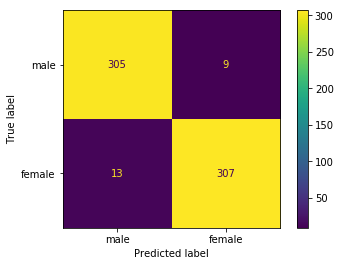

In [363]:
cmdt = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmdt, display_labels=['male', 'female'])
disp.plot()
plt.show()

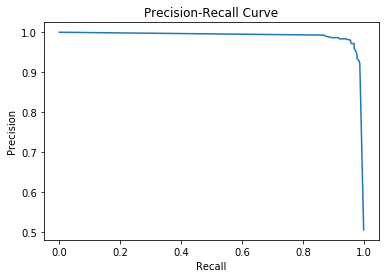

In [364]:
# Predict class probabilities of the input samples X.
y_proba = dt.predict_proba(X_test)[:, 1]
# calculate precision and recall
# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
#create precision recall curve
fig, ax = plt.subplots()
plt.plot(recall, precision)
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
plt.show()

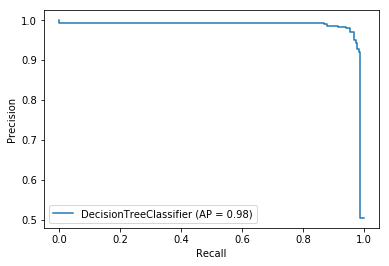

In [365]:
# using sklearn to plot recall precision curve
plot_precision_recall_curve(dt, X_test, y_test)

In [366]:
dt.feature_importances_

array([3.91181421e-04, 0.00000000e+00, 0.00000000e+00, 6.19234156e-04,
       1.79097656e-02, 4.91667328e-02, 4.97565256e-03, 0.00000000e+00,
       5.35152629e-04, 1.91908341e-02, 2.62201796e-03, 0.00000000e+00,
       8.99615101e-01, 1.03669700e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.34119344e-03, 8.15426399e-04, 1.78101116e-03])

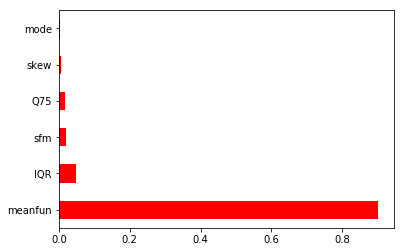

In [367]:
pd.Series(dt.feature_importances_, index=X_train.columns).nlargest(6).plot(kind='barh', color='r')

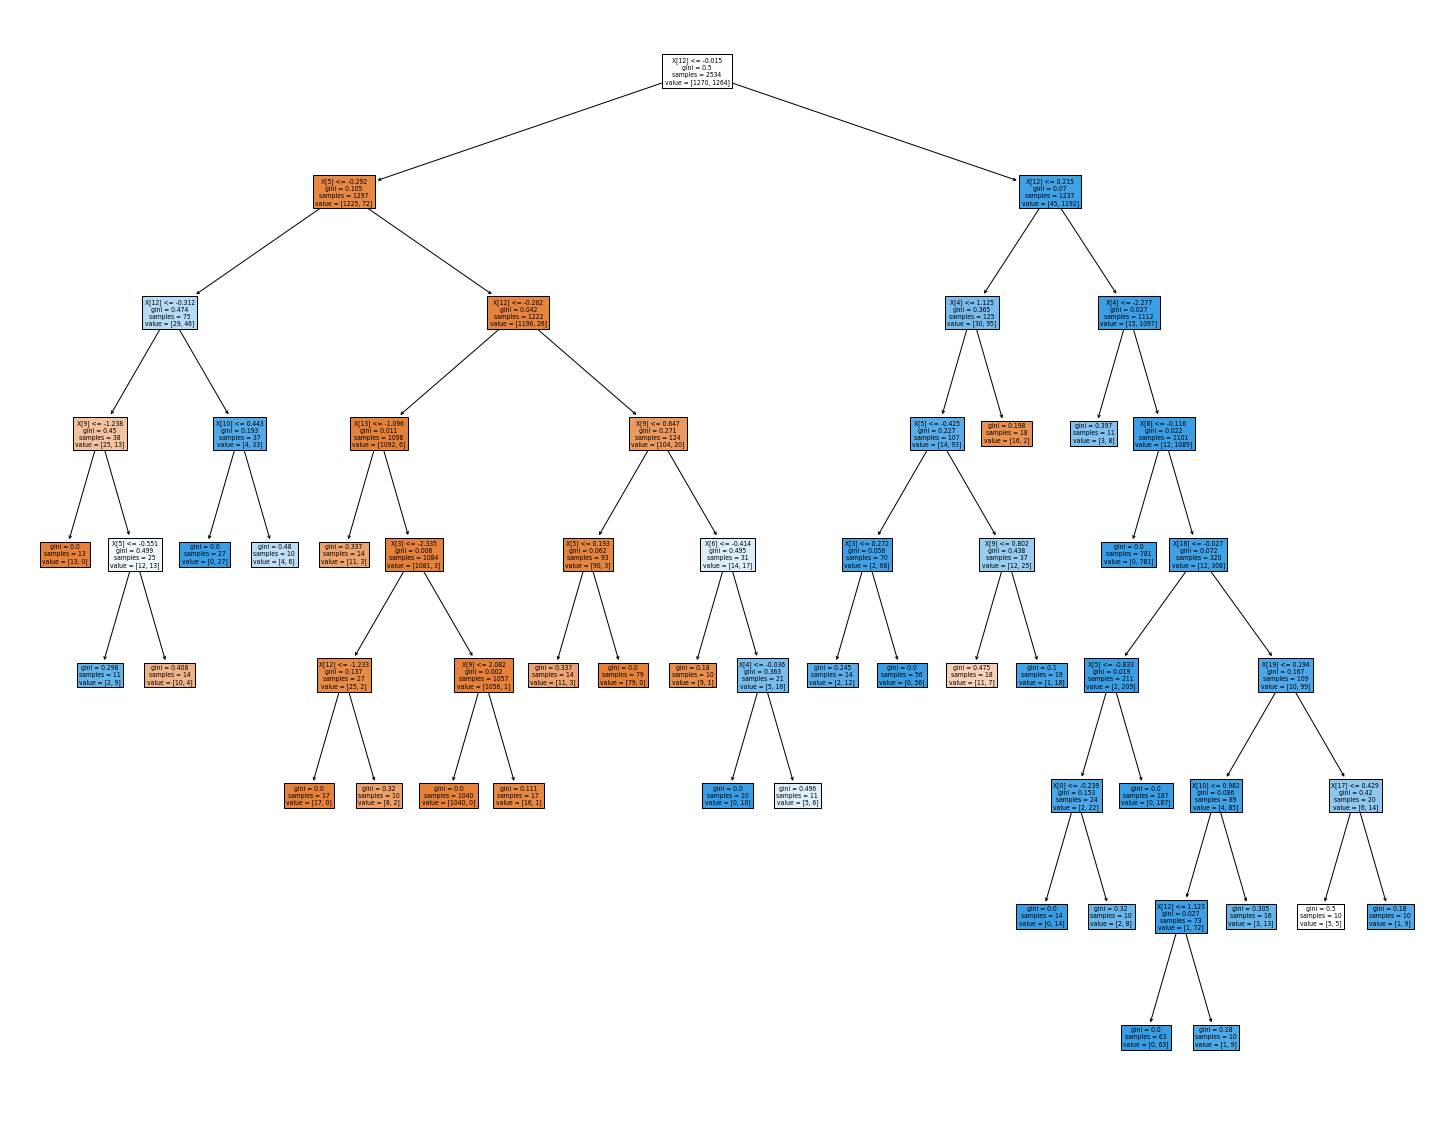

In [368]:
plt.figure(figsize=(25,20));
plot_tree(dt, filled=True);

# Random Forest Model

In [369]:
from sklearn.ensemble import RandomForestClassifier

In [370]:
rf = RandomForestClassifier(n_estimators=300, min_samples_leaf=10, random_state=0)

In [371]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=300, random_state=0)

In [372]:
rf.score(X_test, y_test)

0.9810725552050473

In [373]:
pred_rf = rf.predict(X_test)

In [374]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       314
           1       0.98      0.98      0.98       320

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [375]:
print("Acurracy: ", accuracy_score(y_test, pred_rf))
print("Precision: ", precision_score(y_test, pred_rf))
print("Recall: ", recall_score(y_test, pred_rf))
print("F1-Score: ", f1_score(y_test, pred_rf))

Acurracy:  0.9810725552050473
Precision:  0.9842767295597484
Recall:  0.978125
F1-Score:  0.9811912225705329


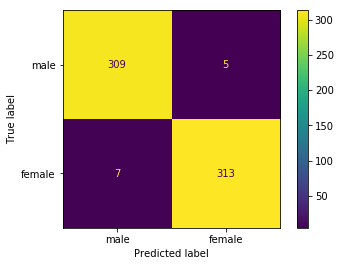

In [376]:
cmrf = confusion_matrix(y_test, pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cmrf, display_labels=['male', 'female'])
disp.plot()
plt.show()

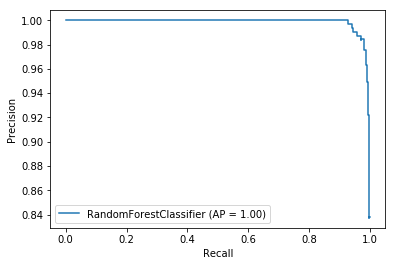

In [377]:
plot_precision_recall_curve(rf, X_test, y_test)

In [378]:
rf.feature_importances_

array([0.01563946, 0.09407797, 0.00956417, 0.12893837, 0.00763082,
       0.22560432, 0.00879402, 0.00640095, 0.04140778, 0.03629738,
       0.01936495, 0.01586504, 0.3580449 , 0.00440991, 0.00296692,
       0.00384011, 0.00661241, 0.00727228, 0.00426248, 0.00300576])

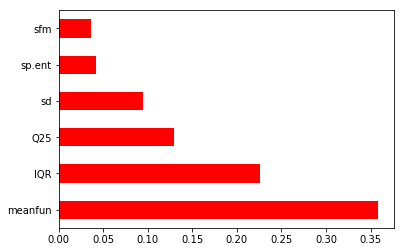

In [379]:
pd.Series(rf.feature_importances_, index=X_train.columns).nlargest(6).plot(kind='barh', color='r')

# Extra Tree Model

In [380]:
from sklearn.ensemble import ExtraTreesClassifier

In [381]:
ex = ExtraTreesClassifier(n_estimators=400, min_samples_split=14, random_state=0)

In [382]:
ex.fit(X_train, y_train)

ExtraTreesClassifier(min_samples_split=14, n_estimators=400, random_state=0)

In [383]:
pred_ex = ex.predict(X_test)

In [384]:
print(classification_report(y_test, pred_ex))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       314
           1       0.99      0.98      0.99       320

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



In [385]:
print("Acurracy: ", accuracy_score(y_test, pred_ex))
print("Precision: ", precision_score(y_test, pred_ex))
print("Recall: ", recall_score(y_test, pred_ex))
print("F1-Score: ", f1_score(y_test, pred_ex))

Acurracy:  0.9873817034700315
Precision:  0.9905660377358491
Recall:  0.984375
F1-Score:  0.9874608150470221


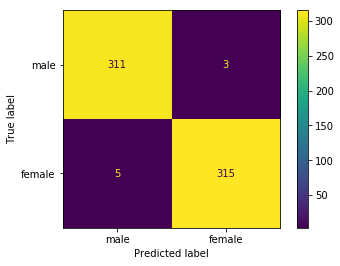

In [386]:
cmex = confusion_matrix(y_test, pred_ex)
disp = ConfusionMatrixDisplay(confusion_matrix=cmex, display_labels=['male', 'female'])
disp.plot()
plt.show()

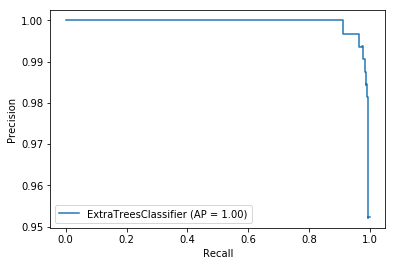

In [387]:
plot_precision_recall_curve(ex, X_test, y_test)

In [388]:
ex.feature_importances_

array([0.02417586, 0.10357463, 0.01769879, 0.13600383, 0.02253063,
       0.19810907, 0.01389414, 0.00971757, 0.04983882, 0.04099551,
       0.02359211, 0.02336592, 0.26313199, 0.01110961, 0.00963261,
       0.01101436, 0.01340085, 0.01010651, 0.0117498 , 0.00635739])

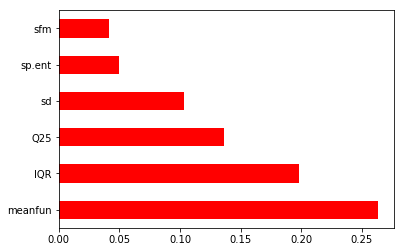

In [389]:
pd.Series(ex.feature_importances_, index=X_train.columns).nlargest(6).plot(kind='barh', color='r')

# XGBoost model

In [390]:
from xgboost import XGBClassifier

In [391]:
xgb = XGBClassifier(n_estimators=400, random_state=0, use_label_encoder=False)

In [392]:
xgb.fit(X_train, y_train, eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [393]:
pred_xgb = xgb.predict(X_test)

In [394]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       314
           1       0.99      0.98      0.99       320

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



In [395]:
print("Acurracy: ", accuracy_score(y_test, pred_xgb))
print("Precision: ", precision_score(y_test, pred_xgb))
print("Recall: ", recall_score(y_test, pred_xgb))
print("F1-Score: ", f1_score(y_test, pred_xgb))

Acurracy:  0.9873817034700315
Precision:  0.9905660377358491
Recall:  0.984375
F1-Score:  0.9874608150470221


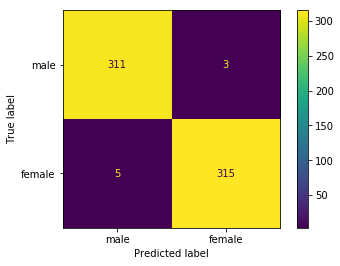

In [396]:
cmxgb = confusion_matrix(y_test, pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cmxgb, display_labels=['male', 'female'])
disp.plot()
plt.show()

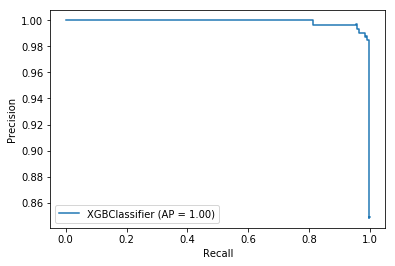

In [397]:
plot_precision_recall_curve(xgb, X_test, y_test)

In [398]:
xgb.feature_importances_

array([0.00990055, 0.01227802, 0.00564407, 0.00938043, 0.03542964,
       0.0927045 , 0.01805394, 0.00337599, 0.01222446, 0.03960782,
       0.00518389, 0.        , 0.66011643, 0.01368847, 0.00927531,
       0.00987011, 0.01318571, 0.02562995, 0.01500634, 0.00944434],
      dtype=float32)

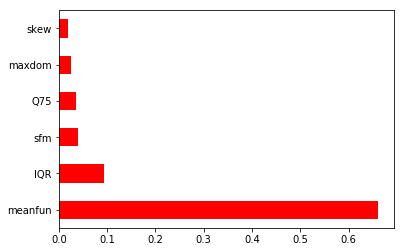

In [399]:
pd.Series(xgb.feature_importances_, index=X_train.columns).nlargest(6).plot(kind='barh', color='r')